References
----------
[1] https://openstax.org/books/calculus-volume-1/pages/3-6-the-chain-rule
    
[2] Checkpoint 3.37
$$
\begin{equation}
h(x)=\frac{x}{(2x+3)^3}
\end{equation}
$$

SymPy version: 1.13.2
NumPy version: 1.26.4
Matplotlib version: 3.9.2

Lambda(x, x/(2*x + 3)**3)
x:[-5.  -4.5 -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5
  2.   2.5  3.   3.5  4.   4.5  5. ]
y:[0.0145772594752187, 0.0208333333333333, 0.0320000000000000, 0.0546875000000000, 0.111111111111111, 0.312500000000000, 2.00000000000000, inf, -1.00000000000000, -0.0625000000000000, 0, 0.00781250000000000, 0.00800000000000000, 0.00694444444444444, 0.00583090379008746, 0.00488281250000000, 0.00411522633744856, 0.00350000000000000, 0.00300525920360631, 0.00260416666666667, 0.00227583067819754]
f′(x)=(3 - 4*x)/(2*x + 3)**4
f′(2)=-0.00208246563931695
y_tangent:[0.0204081632653061 0.0193669304456476 0.0183256976259892
 0.0172844648063307 0.0162432319866722 0.0152019991670137
 0.0141607663473553 0.0131195335276968 0.0120783007080383
 0.0110370678883798 0.00999583506872137 0.00895460224906289
 0.00791336942940441 0.00687213660974594 0.00583090379008746
 0.00478967097042899 0.003748438150

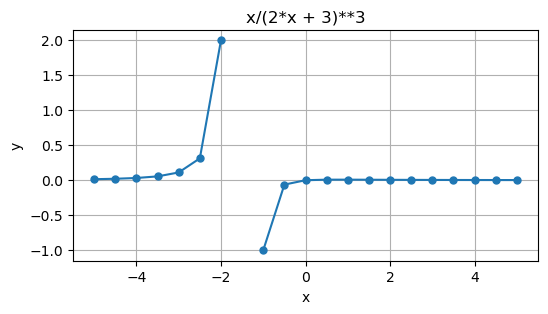

In [1]:
import sympy as sp
from sympy.abc import x
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

print(f"SymPy version: {sp.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")
print()

f = sp.Lambda(x, x / (2 * x + 3) ** 3)
print(f)

x_values = np.linspace(-5, 5, 21)
print(f"x:{x_values}")


def map_x_values(x_value):
    result = f(x_value)
    if result == sp.zoo:
        return np.inf
    return result


y_values = list(map(map_x_values, x_values))
print(f"y:{y_values}")

f_prime = sp.diff(f(x), x)
print(f"f′(x)={f_prime.simplify()}")

x_at = 2


def calculate_slope(derivative_fn, derivative_order=1):
    slope = derivative_fn.subs(x, x_at).evalf()
    apostrophe = "′" * derivative_order
    print(f"f{apostrophe}({x_at})={slope}")
    y_tangent = slope * (x_values - x_at) + f(x_at).evalf()
    print(f"y_tangent:{y_tangent}")
    return slope, y_tangent


slope, y_tangent = calculate_slope(f_prime)

figure, axes = plt.subplots(figsize=(6, 3))
axes.set_xlabel("x")
axes.set_ylabel("y")
axes.set_title(f.expr)
axes.grid()
axes.plot(x_values, y_values, marker="o", markersize=5)
plt.show()